In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [2]:
os.getcwd()

'/kaggle/working'

In [3]:
os.listdir('/kaggle/input/')

['titanicdataset-traincsv']

# The Data Set

In [4]:
#Create a datafram  from a csv file
df = pd.read_csv("..//input/titanicdataset-traincsv/train.csv")
df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


A short description of what the columns represent

Variable Name | Description
--------------|-------------
Survived      | Survived (1) or died (0)
Pclass        | Passenger's class
Name          | Passenger's name
Sex           | Passenger's sex
Age           | Passenger's age
SibSp         | Number of siblings/spouses aboard
Parch         | Number of parents/children aboard
Ticket        | Ticket number
Fare          | Fare
Cabin         | Cabin
Embarked      | Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [5]:
# Inspecting dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df.shape      # Check dimensions

(891, 12)

In [8]:
# Getting a quick look at all the numerical data and their 
# descriptive statistics include those that summarize the central tendency,
# dispersion and shape of a dataset’s distribution
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
print(df["Age"].isnull().sum())

177


Columns "Age" has 177 null values, we can try to impute it with some central values. Based on the statistic description table above, the mean and meadian for this attribute are 29 and 28 respectively. We can impute these two values into the missing data.

In [10]:
df["Age"] = np.where(df["Age"].isnull(),            # impute the missing data with random number from 28 to 30
                    np.random.randint(28, 31),
                    df["Age"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Next let's look at the "Sex" and "Pclass" column and inspect 

In [11]:
survival_freq = pd.crosstab(index = df["Survived"], columns = df["Sex"] )  #making a frequency table
survival_freq.index = ["Died", "Survived"]
survival_freq

Sex,female,male
Died,81,468
Survived,233,109


In [12]:
survival_freq = pd.crosstab(index = df["Survived"], columns = df["Sex"], normalize = 'columns' )  #turining it into percentage
survival_freq.index = ["Died", "Survived"]
survival_freq

Sex,female,male
Died,0.257962,0.811092
Survived,0.742038,0.188908


In [13]:
survived_class = pd.crosstab(index=df["Survived"], 
                            columns=df["Pclass"], margins = True, normalize = True) #making a frequency table and adding the subtotal

survived_class.columns = ["class1","class2","class3", "total"]
survived_class.index= ["died","survived","total"]
survived_class

,class1,class2,class3,total
died,0.089787,0.108866,0.417508,0.616162
survived,0.152637,0.097643,0.133558,0.383838
total,0.242424,0.206510,0.551066,1.000000


Transformed it into percentage, we can see that a only a large percent of male passenger died while a small percentage of female passengers died. Class 3 has the most passengers and also has the most fetality among the passenger classes. \
Since the passenger class columns only has three unique values, we can reclassify it as a category

In [14]:
# new_Pclass = pd.Categorical(df["Pclass"],
                           #ordered=True)

#new_Pclass = new_Pclass.rename_categories(["Class1","Class2","Class3"])     

#new_Pclass.describe() 

In [15]:
#df["Pclass"] = new_Pclass    #Updated new dataframe
# df

In [16]:
df["Ticket"][0:15]   #inspecting the "Ticket" columns

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
Name: Ticket, dtype: object

In [17]:
df["Ticket"].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

Ticket has 680 unique values: almost as many as there are passengers. Categorical variables with almost as many levels as there are records are often not very useful for prediction. We could try to reduce the number of levels by grouping certain tickets together, but the ticket numbers don't appear to follow any logical pattern we could use for grouping. We can remove it

In [18]:
del df["Ticket"]

Now we can look the how much each passenger pay for their ticket and construct a boxplot to define  any outlier as it could potentially skew out data

In [19]:
df["Fare"].describe()   #inspecting the "Fare"  column

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [20]:
new_df = df.query("Fare < 200 & Fare > 0")

new_df["Fare"].describe()

count    856.000000
mean      26.995068
std       29.394578
min        4.012500
25%        7.925000
50%       14.454200
75%       30.017700
max      164.866700
Name: Fare, dtype: float64

<Axes: >

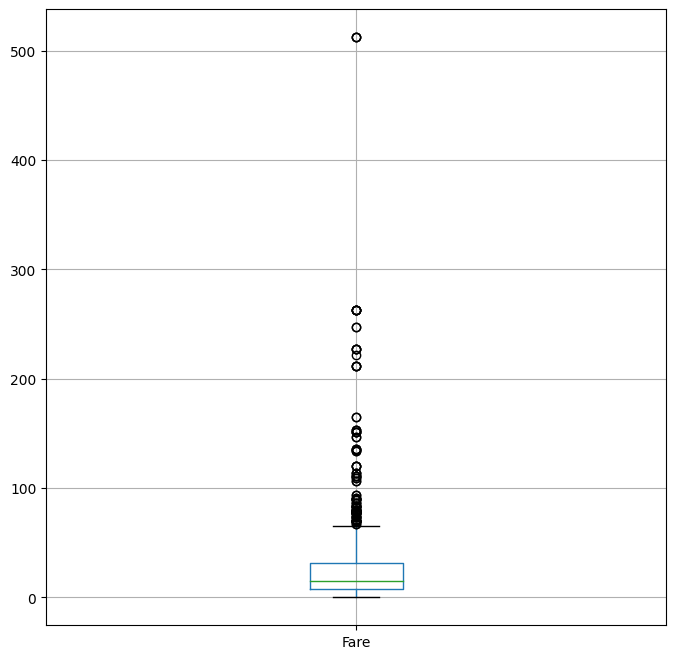

In [21]:
df.boxplot(column = 'Fare', figsize = (8,8))

We can see that there is one value that is over 200 and one value that is over 500, and a the minimum fare is 0 which  does not make a lot of sense. There outlier can be filtered out

<Axes: >

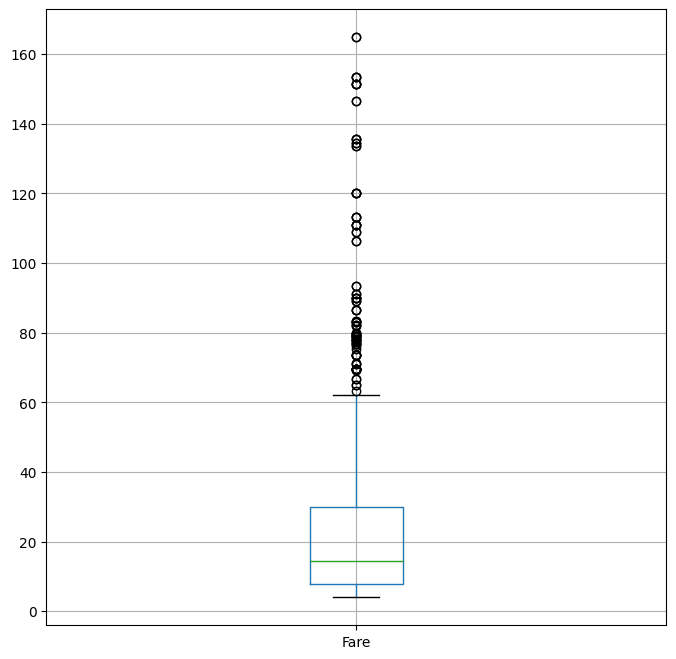

In [22]:
new_df.boxplot(column = 'Fare', figsize = (8,8))

In [23]:
df["Cabin"].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [24]:
df["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [25]:
char_cabin = df["Cabin"].astype(str)  #converting data to str
new_cabin = np.array([cabin[0] for cabin in char_cabin])  #take the first letter from cabin
new_cabin = pd.Categorical(new_cabin)
new_cabin.describe()

,counts,freqs
categories,,
A,15,0.016835
B,47,0.052750
C,59,0.066218
D,33,0.037037
E,32,0.035915
F,13,0.014590
G,4,0.004489
T,1,0.001122
n,687,0.771044


In [26]:
df["Cabin"] = new_cabin  #replace the "Cabin" column with only the first letter

In [27]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,n,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,n,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,n,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,n,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,23.4500,n,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,C


In [28]:
df["Embarked"].describe()   #looking at the "Embarked column"

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [29]:
cabin_survived = pd.crosstab(index = df["Embarked"], columns  = df["Survived"], margins = True)
cabin_survived.columns = ("Dead", "Survived", "Total")
cabin_survived

,Dead,Survived,Total
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


Passenger from embarkment Southamton has the highest number of passengers but lowest survival rate, which can sugguest that it could be the most affordable ticket's embarkment

In [30]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

def str_to_int(char_list):
    result = []
    for letter in char_list:
        if letter == "C":
            result.append(1)
        elif letter == "Q":
            result.append(2)
        elif letter == "S":
            result.append(3)
        else:
            result.append(None)  # Handle other cases if needed
    return result# Decision Tree Modeling

In [31]:
from sklearn import tree
from sklearn import preprocessing

In [32]:
# Initialize label encoder
label_encoder = preprocessing.LabelEncoder()

# Convert Sex variable to numeric
encoded_sex = label_encoder.fit_transform(df["Sex"])

# Initialize model
tree_model = tree.DecisionTreeClassifier()

# Train the model
tree_model.fit(X = pd.DataFrame(encoded_sex), 
               y = df["Survived"])

DecisionTreeClassifier()

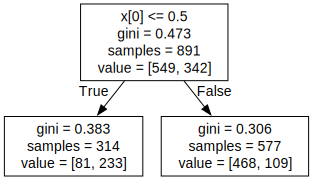

In [33]:
import graphviz

dot_data = tree.export_graphviz(tree_model, out_file = None)
graph = graphviz.Source(dot_data)
graph

In [34]:
# Get survival probability
preds = tree_model.predict_proba(X = pd.DataFrame(encoded_sex))

pd.crosstab(preds[:,0], df["Sex"])

Sex,female,male
row_0,,
0.257962,314,0
0.811092,0,577


In [35]:
#Adding another variable, to the model and make a dataframe with the sex variable

predictors = pd.DataFrame([encoded_sex, df["Pclass"]]).T

#Train the model
tree_model.fit(X = predictors,
              y = df["Survived"])


DecisionTreeClassifier()

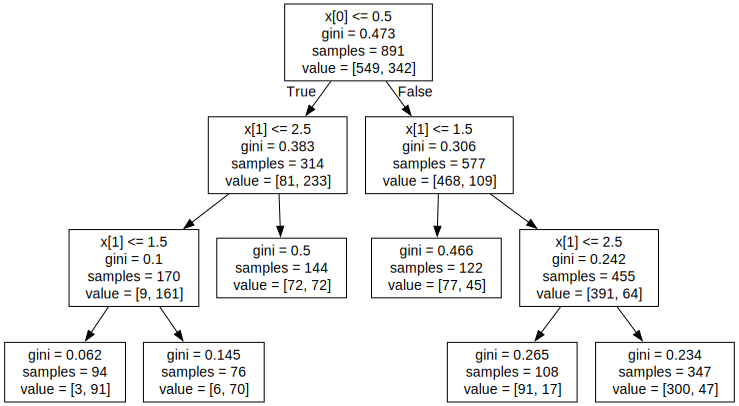

In [36]:
# Save tree as dot file
dot_data = tree.export_graphviz(tree_model, out_file=None) 
graph = graphviz.Source(dot_data)  
graph 

In [37]:
#Get survival probability 
preds = tree_model.predict_proba(X = predictors)

#create a table of predictions by sex and class
pd.crosstab(preds[:,0], columns = [df["Pclass"], df["Sex"]])

Pclass        1           2           3     
Sex      female male female male female male
row_0                                       
0.031915     94    0      0    0      0    0
0.078947      0    0     76    0      0    0
0.500000      0    0      0    0    144    0
0.631148      0  122      0    0      0    0
0.842593      0    0      0  108      0    0
0.864553      0    0      0    0      0  347

In [38]:
tree_model.score(X = predictors,
                 y=df["Survived"])

0.7867564534231201

This model predicts a higher survival rate for women higher than men. For instance, women in first class only has 3% of death rate while men in first class has 6% of death rate. On the second class, women have 7% of dead rate compared to 84% that of men. And in third class, women has 50% of death rate compared to 86% of men. This model is 78% accurate on the training data

Let's throw in another variable Embarkment and see how the model performs and how accurate it is

In [39]:
df["Embarked"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Embarked
Non-Null Count  Dtype 
--------------  ----- 
889 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [40]:
def str_to_int(char_list):              # Converting the column Embarked from C, Q, S to 1,2,3 respectively
    result = []
    for letter in char_list:
        if letter == "C":
            result.append(1)
        elif letter == "Q":
            result.append(2)
        elif letter == "S":
            result.append(3)
        else:
           result.append(0)  # Handle other cases if needed
    return result

In [41]:
embarkment = str_to_int(df["Embarked"])
len(embarkment)

891

In [42]:
#Adding another variable, "Embarked" and train the model

predictors = pd.DataFrame([encoded_sex, df["Pclass"], embarkment]).T
#Train the model
tree_model.fit(X = predictors,
              y = df["Survived"])


DecisionTreeClassifier()

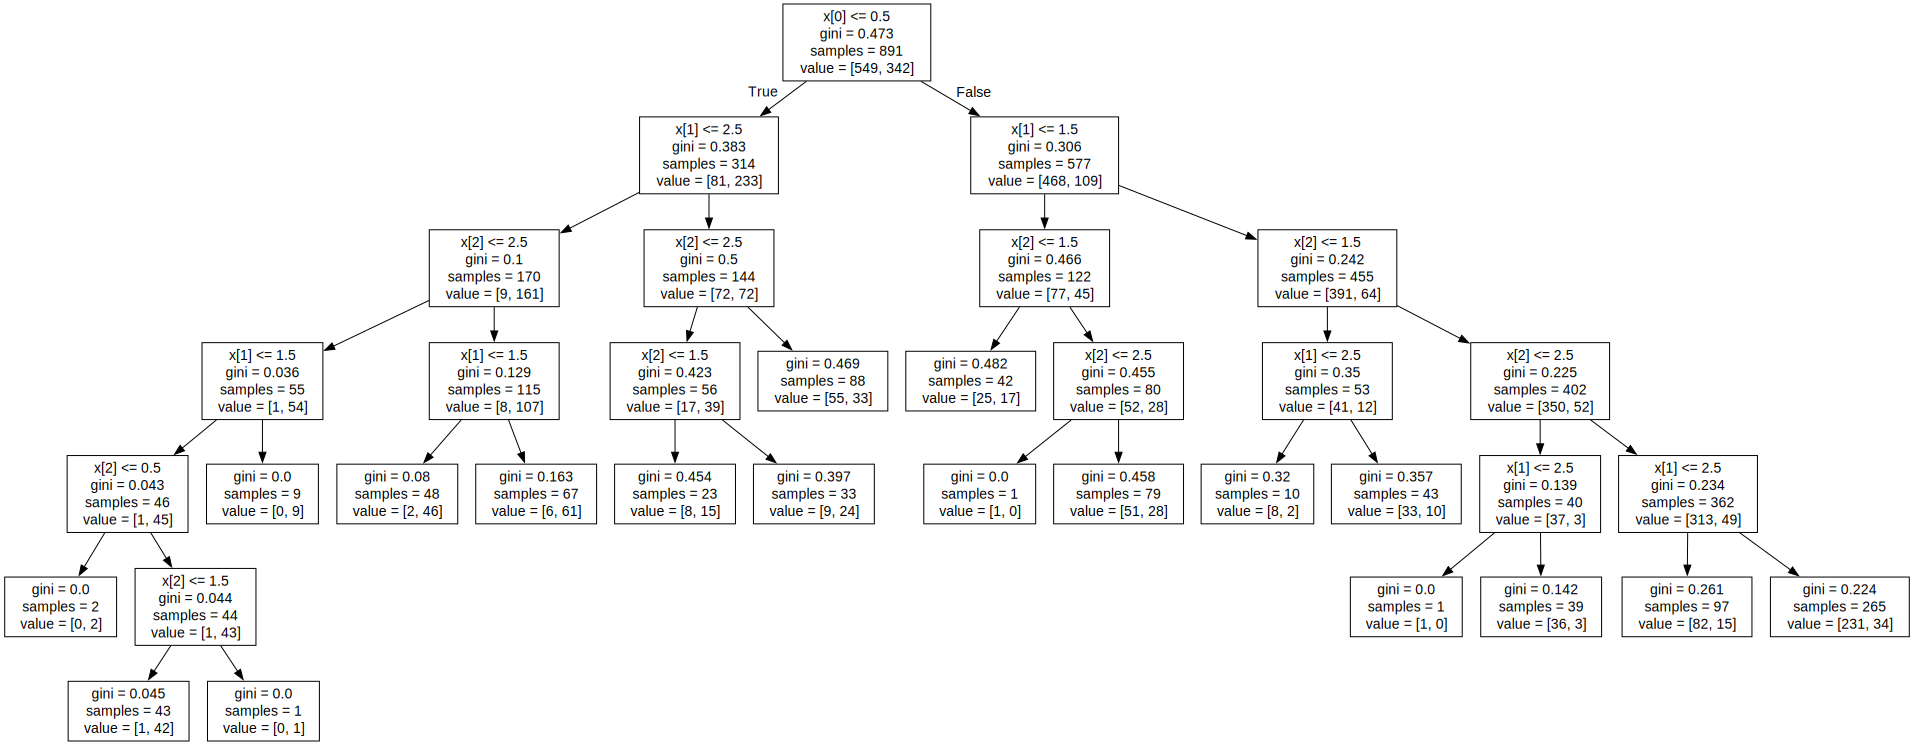

In [43]:
dot_data = tree.export_graphviz(tree_model, out_file=None) 
graph = graphviz.Source(dot_data)  
graph 

In [44]:
tree_model.score(X = predictors,
                 y=df["Survived"])

0.8114478114478114

The model above is 81.14% accurate on the the training data 